In [149]:
import pandas as pd

import matplotlib.pyplot as plt

1. Importar el conjunto de datos de Población del INE:

   - Utiliza la librería Pandas para importar el archivo CSV del conjunto 9689 - "Población por provincia, sexo y edad" del sitio web del INE.

   2. Explorar y describir los datos:

   - Visualiza las primeras 10 filas del dataset para familiarizarte con la estructura y contenido de los datos.


In [150]:
df= pd.read_csv('./data/9689.csv', sep= ';')

df.head(10)



,Provincias,Grupo quinquenal de edad,Nacionalidad,Sexo,Periodo,Total
0,Total Nacional,Total,Total,Ambos sexos,1 de julio de 2022,"47615033,864697"
1,Total Nacional,Total,Total,Ambos sexos,1 de enero de 2022,"47432892,943294"
2,Total Nacional,Total,Total,Ambos sexos,1 de julio de 2021,"47331301,774407"
3,Total Nacional,Total,Total,Ambos sexos,1 de enero de 2021,"47398694,945392"
4,Total Nacional,Total,Total,Ambos sexos,1 de julio de 2020,"47355684,576847"
5,Total Nacional,Total,Total,Ambos sexos,1 de enero de 2020,"47332613,88819"
6,Total Nacional,Total,Total,Ambos sexos,1 de julio de 2019,"47105358,373156"
7,Total Nacional,Total,Total,Ambos sexos,1 de enero de 2019,"46937059,877999"
8,Total Nacional,Total,Total,Ambos sexos,1 de julio de 2018,"46728814,005226"
9,Total Nacional,Total,Total,Ambos sexos,1 de enero de 2018,"46658446,57237"


Identifica los tipos de datos de cada columna y asegúrate de que están correctamente asignados.

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   Provincias                1048575 non-null  object
 1   Grupo quinquenal de edad  1048575 non-null  object
 2   Nacionalidad              1048575 non-null  object
 3   Sexo                      1048575 non-null  object
 4   Periodo                   1048575 non-null  object
 5   Total                     887295 non-null   object
dtypes: object(6)
memory usage: 48.0+ MB


Pasamos la columna Total a int64, realizamos tambien proceso de limpieza de filas vacias


In [152]:
df.dropna(inplace=True, axis = 0)
df

,Provincias,Grupo quinquenal de edad,Nacionalidad,Sexo,Periodo,Total
0,Total Nacional,Total,Total,Ambos sexos,1 de julio de 2022,"47615033,864697"
1,Total Nacional,Total,Total,Ambos sexos,1 de enero de 2022,"47432892,943294"
2,Total Nacional,Total,Total,Ambos sexos,1 de julio de 2021,"47331301,774407"
3,Total Nacional,Total,Total,Ambos sexos,1 de enero de 2021,"47398694,945392"
4,Total Nacional,Total,Total,Ambos sexos,1 de julio de 2020,"47355684,576847"
...,...,...,...,...,...,...
1048570,30 Murcia,Total,Española,Mujeres,1 de julio de 2002,"576313,91858"
1048571,30 Murcia,Total,Española,Mujeres,1 de enero de 2002,"574512,78891"
1048572,30 Murcia,Total,País de la UE27_2020 sin España,Ambos sexos,1 de julio de 2022,"31723,884724"
1048573,30 Murcia,Total,País de la UE27_2020 sin España,Ambos sexos,1 de enero de 2022,"31717,51925"


In [153]:
def Eliminar_coma(x):
    x= x.replace('.','')
    x = x.replace(',','.')
    return x


In [154]:

df['Total'] = df['Total'].apply(Eliminar_coma)
df['Total'] = df['Total'].apply(lambda x : int(float (x)))

In [155]:
df

,Provincias,Grupo quinquenal de edad,Nacionalidad,Sexo,Periodo,Total
0,Total Nacional,Total,Total,Ambos sexos,1 de julio de 2022,47615033
1,Total Nacional,Total,Total,Ambos sexos,1 de enero de 2022,47432892
2,Total Nacional,Total,Total,Ambos sexos,1 de julio de 2021,47331301
3,Total Nacional,Total,Total,Ambos sexos,1 de enero de 2021,47398694
4,Total Nacional,Total,Total,Ambos sexos,1 de julio de 2020,47355684
...,...,...,...,...,...,...
1048570,30 Murcia,Total,Española,Mujeres,1 de julio de 2002,576313
1048571,30 Murcia,Total,Española,Mujeres,1 de enero de 2002,574512
1048572,30 Murcia,Total,País de la UE27_2020 sin España,Ambos sexos,1 de julio de 2022,31723
1048573,30 Murcia,Total,País de la UE27_2020 sin España,Ambos sexos,1 de enero de 2022,31717


Calcula y reporta la media, mediana, desviación estándar, y valores mínimo y máximo de las siguientes variables:

- Población total

Eliminamos todas los periodos de julio, nos quedamos con enero como valor de todo el año

In [156]:
df = df.query('Periodo.str.contains("enero")')
df

,Provincias,Grupo quinquenal de edad,Nacionalidad,Sexo,Periodo,Total
1,Total Nacional,Total,Total,Ambos sexos,1 de enero de 2022,47432892
3,Total Nacional,Total,Total,Ambos sexos,1 de enero de 2021,47398694
5,Total Nacional,Total,Total,Ambos sexos,1 de enero de 2020,47332613
7,Total Nacional,Total,Total,Ambos sexos,1 de enero de 2019,46937059
9,Total Nacional,Total,Total,Ambos sexos,1 de enero de 2018,46658446
...,...,...,...,...,...,...
1048565,30 Murcia,Total,Española,Mujeres,1 de enero de 2005,588785
1048567,30 Murcia,Total,Española,Mujeres,1 de enero de 2004,583572
1048569,30 Murcia,Total,Española,Mujeres,1 de enero de 2003,578899
1048571,30 Murcia,Total,Española,Mujeres,1 de enero de 2002,574512


Editamos el campo Periodo dejando solo el año

In [157]:
df['Periodo']=df['Periodo'].apply(lambda x: int(x[-4:]))


C:\Users\Usuario\AppData\Local\Temp\ipykernel_37500\1863666306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Periodo']=df['Periodo'].apply(lambda x: int(x[-4:]))


In [158]:
df

,Provincias,Grupo quinquenal de edad,Nacionalidad,Sexo,Periodo,Total
1,Total Nacional,Total,Total,Ambos sexos,2022,47432892
3,Total Nacional,Total,Total,Ambos sexos,2021,47398694
5,Total Nacional,Total,Total,Ambos sexos,2020,47332613
7,Total Nacional,Total,Total,Ambos sexos,2019,46937059
9,Total Nacional,Total,Total,Ambos sexos,2018,46658446
...,...,...,...,...,...,...
1048565,30 Murcia,Total,Española,Mujeres,2005,588785
1048567,30 Murcia,Total,Española,Mujeres,2004,583572
1048569,30 Murcia,Total,Española,Mujeres,2003,578899
1048571,30 Murcia,Total,Española,Mujeres,2002,574512


cojemos poblacion total

In [159]:
df_total = df.loc[(df['Grupo quinquenal de edad']=='Total')&(df['Sexo']=='Ambos sexos')&(df['Nacionalidad']=='Total')&(df['Provincias']=='Total Nacional')]

Tmean = df_total.loc[:, 'Total'].mean()
Tmedian = df_total.loc[:, 'Total'].median()
Tstd = df_total.loc[:, 'Total'].std()
Tmax = df_total.loc[:, 'Total'].max()
Tmin = df_total.loc[:, 'Total'].min()

print("La media de poblacion total es: ", Tmean)
print("La mediana de poblacion total es: ", Tmedian)
print("La desviacion estandar de poblacion total es: ", Tstd)
print("El max de poblacion total es: ", Tmax)
print("El min de poblacion total es: ", Tmin)

La media de poblacion total es:  45609439.571428575
La mediana de poblacion total es:  46486621.0
La desviacion estandar de poblacion total es:  1918337.5149562075
El max de poblacion total es:  47432892
El min de poblacion total es:  41035270


Para hombres

In [160]:
df_man = df.loc[(df['Grupo quinquenal de edad']=='Total')&(df['Sexo']=='Hombres')&(df['Nacionalidad']=='Total')&(df['Provincias']=='Total Nacional')]

Mmean = df_man.loc[:, 'Total'].mean()
Mmedian = df_man.loc[:, 'Total'].median()
Mstd = df_man.loc[:, 'Total'].std()
Mmax = df_man.loc[:, 'Total'].max()
Mmin = df_man.loc[:, 'Total'].min()

print("La media de hombres es: ", Mmean)
print("La mediana de hombres es: ", Mmedian)
print("La desviacion estandar de hombres total es: ", Mstd)
print("El max de hombres es: ", Mmax)
print("El min de hombres es: ", Mmin)

La media de hombres es:  22441773.714285713
La mediana de hombres es:  22877461.0
La desviacion estandar de hombres total es:  942764.7259211146
El max de hombres es:  23237151
El min de hombres es:  20115521


In [161]:
df_woman = df.loc[(df['Grupo quinquenal de edad']=='Total')&(df['Sexo']=='Mujeres')&(df['Nacionalidad']=='Total')&(df['Provincias']=='Total Nacional')]

Wmean = df_woman.loc[:, 'Total'].mean()
Wmedian = df_woman.loc[:, 'Total'].median()
Wstd = df_woman.loc[:, 'Total'].std()
Wmax = df_woman.loc[:, 'Total'].max()
Wmin = df_woman.loc[:, 'Total'].min()

print("La media de hombres es: ", Wmean)
print("La mediana de hombres es: ", Wmedian)
print("La desviacion estandar de hombres total es: ", Wstd)
print("El max de hombres es: ", Wmax)
print("El min de hombres es: ", Wmin)

La media de hombres es:  23167665.38095238
La mediana de hombres es:  23623018.0
La desviacion estandar de hombres total es:  981874.4531849007
El max de hombres es:  24195741
El min de hombres es:  20919749


 Análisis y transformaciones de datos:

   - Identifica y maneja adecuadamente cualquier valor faltante en el dataset.

   - Calcula la Tasa de Variación Anual de la Población total (*1) entre los años 2019 y 2022.

Cojemos los totales de 2019 y 2020

In [162]:
df_T2019 = df.loc[(df['Periodo']==2019)&(df['Grupo quinquenal de edad']=='Total')&(df['Sexo']=='Ambos sexos')&(df['Nacionalidad']=='Total')&(df['Provincias']=='Total Nacional')]
df_T2022 = df.loc[(df['Periodo']==2022)&(df['Grupo quinquenal de edad']=='Total')&(df['Sexo']=='Ambos sexos')&(df['Nacionalidad']=='Total')&(df['Provincias']=='Total Nacional')]


In [163]:
df_T2019

,Provincias,Grupo quinquenal de edad,Nacionalidad,Sexo,Periodo,Total
7,Total Nacional,Total,Total,Ambos sexos,2019,46937059


In [164]:
df_T2022

,Provincias,Grupo quinquenal de edad,Nacionalidad,Sexo,Periodo,Total
1,Total Nacional,Total,Total,Ambos sexos,2022,47432892


Calculamos la tasa de variacion anual para 2019 y 2022

P1 = 2022

P2 = 2019

Tasa de variación anual = ((Población P1 - Población P2) / Población P1) * 100

In [165]:
P2 = sum(df_T2019['Total'])
P1 = sum(df_T2022['Total'])

tva = ((P1-P2)/P1)*100

tva

1.0453357977835298

Genera un gráfico de líneas que muestre la evolución de la población total a lo largo del tiempo.

In [166]:
df_mostar = df.loc[(df['Grupo quinquenal de edad']=='Total')&(df['Sexo']=='Ambos sexos')&(df['Nacionalidad']=='Total')&(df['Provincias']=='Total Nacional')]
df_mostar

,Provincias,Grupo quinquenal de edad,Nacionalidad,Sexo,Periodo,Total
1,Total Nacional,Total,Total,Ambos sexos,2022,47432892
3,Total Nacional,Total,Total,Ambos sexos,2021,47398694
5,Total Nacional,Total,Total,Ambos sexos,2020,47332613
7,Total Nacional,Total,Total,Ambos sexos,2019,46937059
9,Total Nacional,Total,Total,Ambos sexos,2018,46658446
11,Total Nacional,Total,Total,Ambos sexos,2017,46527038
13,Total Nacional,Total,Total,Ambos sexos,2016,46440099
15,Total Nacional,Total,Total,Ambos sexos,2015,46449564
17,Total Nacional,Total,Total,Ambos sexos,2014,46512198
19,Total Nacional,Total,Total,Ambos sexos,2013,46727890


<Figure size 1200x1200 with 0 Axes>

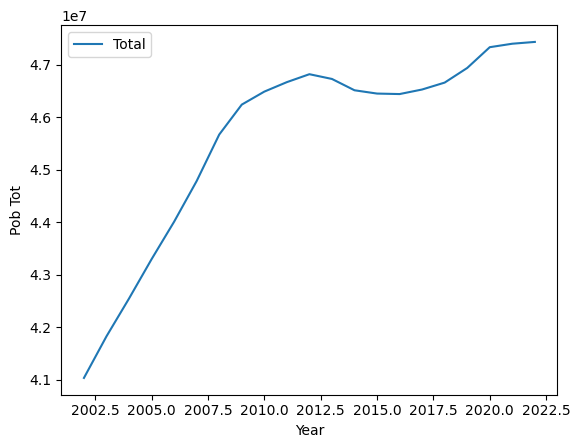

In [167]:
plt.figure(figsize=(12, 12))
df_mostar.plot(x="Periodo", y="Total")
plt.xlabel("Year")
plt.ylabel("Pob Tot")
plt.show()

Calcula la Tasa de Dependencia Demográfica (*2) y analiza su evolución en el período 2019-2022.

Esta tasa se representa por un porcentaje sobre la población activa o en edad de trabajar por un periodo predeterminado. Para su cálculo, debemos dividir el número de personas “dependientes” (osea las que tienen entre 0 y 14 años más los mayores de 65 años) entre el número de personas “activas” (osea que tienen entre 15 y 64 años) y representar el valor final en porcentaje.

Cuanto más elevado sea el porcentaje de la tasa de dependencia, mayor será la carga que soporta la población activa para mantener a la población que depende de ellos. Si, por el contrario, la tasa es menor, la carga para la población activa o productiva se va a reducir.


In [169]:
df_0_14_2019 = df.loc[(df['Periodo']==2019)&((df['Grupo quinquenal de edad']=='De 5 a 9 años')|(df['Grupo quinquenal de edad']=='De 10 a 14 años')|(df['Grupo quinquenal de edad']=='De 0 a 4 años'))&(df['Sexo']=='Ambos sexos')&(df['Nacionalidad']=='Total')&(df['Provincias']=='Total Nacional')]
df_0_14_2022 = df.loc[(df['Periodo']==2022)&((df['Grupo quinquenal de edad']=='De 5 a 9 años')|(df['Grupo quinquenal de edad']=='De 10 a 14 años')|(df['Grupo quinquenal de edad']=='De 0 a 4 años'))&(df['Sexo']=='Ambos sexos')&(df['Nacionalidad']=='Total')&(df['Provincias']=='Total Nacional')]


Pob_0_14_2019 = sum(df_0_14_2019['Total'])
Pob_0_14_2022 = sum(df_0_14_2022['Total'])

print(Pob_0_14_2019)
print(Pob_0_14_2022)

6930117
6627937


In [170]:
df_65_2019 = df.loc[((df['Grupo quinquenal de edad']=='De 65 a 69 años')|(df['Grupo quinquenal de edad']=='De 70 a 74 años')|(df['Grupo quinquenal de edad']=='De 75 a 79 años')|(df['Grupo quinquenal de edad']=='De 80 a 84 años')|(df['Grupo quinquenal de edad']=='De 85 a 89 años')|(df['Grupo quinquenal de edad']=='90 y más años'))&(df['Periodo']==2019)&(df['Sexo']=='Ambos sexos')&(df['Nacionalidad']=='Total')&(df['Provincias']=='Total Nacional')]
df_65_2022 = df.loc[((df['Grupo quinquenal de edad']=='De 65 a 69 años')|(df['Grupo quinquenal de edad']=='De 70 a 74 años')|(df['Grupo quinquenal de edad']=='De 75 a 79 años')|(df['Grupo quinquenal de edad']=='De 80 a 84 años')|(df['Grupo quinquenal de edad']=='De 85 a 89 años')|(df['Grupo quinquenal de edad']=='90 y más años'))&(df['Periodo']==2022)&(df['Sexo']=='Ambos sexos')&(df['Nacionalidad']=='Total')&(df['Provincias']=='Total Nacional')]

Pob_65_2019 = sum(df_65_2019['Total'])
Pob_65_2022 = sum(df_65_2022['Total'])

print(Pob_65_2019)
print(Pob_65_2022)

9105571
9526627


Recuperamos P1(2022) i P2(2019) poblaciones totales de 2019 i 2022

In [173]:
Pob_Dep_2019 = Pob_65_2019 + Pob_0_14_2019
Pob_Dep_2022 = Pob_65_2022 + Pob_0_14_2022

Pob_Act_2019 = P2-Pob_Dep_2019
Pob_Act_2022 = P1-Pob_Dep_2022

print(Pob_Act_2019)
print(Pob_Act_2022)

30901371
31278328


Tasa de dependencia demografica

In [174]:
TDD_2019 = Pob_Act_2019/Pob_Dep_2019
TDD_2022 = Pob_Act_2022/Pob_Dep_2022

print(TDD_2019)
print(TDD_2022)

1.9270374305112448
1.9361914069609059


Genera un gráfico de barras que muestre la distribución de la población por grupos de edad (0-14, 15-64, 65 y más) para el año 2022.

